# Inspection des caractéristiques d'une population de personnes — Corrigé 

Version du 10 avril 2022

* https://www.insee.fr/fr/statistiques/2532244#documentation
* https://juba.github.io/tidyverse/22-ressources.html#hdv2003


Variable : Description<br/>id : Identifiant (numéro de ligne)<br/>poids : Variable de pondération<br/>age : Âge<br/>sexe : Sexe<br/>nivetud : Niveau d’études atteint<br/>occup : Occupation actuelle<br/>qualif : Qualification de l’emploi actuel<br/>freres.soeurs : Nombre total de frères, sœurs, demi-frères et demi-sœurs<br/>clso : Sentiment d’appartenance à une classe sociale<br/>relig : Pratique et croyance religieuse<br/>trav.imp : Importance accordée au travail<br/>trav.satisf : Satisfaction ou insatisfaction au travail<br/>hard.rock : Écoute du Hard rock ou assimilés<br/>lecture.bd : Lecture de bandes dessinées<br/>peche.chasse : Pêche ou chasse pour le plaisir au cours des 12 derniers mois<br/>cuisine : Cuisine pour le plaisir au cours des 12 derniers mois<br/>bricol : Bricolage ou mécanique pour le plaisir au cours des 12 derniers mois<br/>cinema : Cinéma au cours des 12 derniers mois<br/>sport : Sport ou activité physique pour le plaisir au cours des 12 derniers mois<br/>heures.tv : Nombre moyen d’heures passées à regarder la télévision par jour<br/>

## Importer les librairies nécessaires

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Analyser les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

In [2]:
### Lire le fichier corrigé manuellement – ne pas effacer !

path = 'data/hdv2003.csv'

observations_mod = pd.read_csv(path)
observations_mod.set_index('id', inplace=True)
observations_mod.head()

,age,sexe,nivetud,poids,occup,qualif,freres.soeurs,clso,relig,trav.imp,trav.satisf,hard.rock,lecture.bd,peche.chasse,cuisine,bricol,cinema,sport,heures.tv
id,,,,,,,,,,,,,,,,,,,
1,28,Femme,Enseignement superieur y compris technique sup...,2634.398216,Exerce une profession,Employe,8,Oui,Ni croyance ni appartenance,Peu important,Insatisfaction,Non,Non,Non,Oui,Non,Non,Non,0.0
2,23,Femme,NaN,9738.395776,"Etudiant, eleve",NaN,2,Oui,Ni croyance ni appartenance,NaN,NaN,Non,Non,Non,Non,Non,Oui,Oui,1.0
3,59,Homme,Derniere annee d'etudes primaires,3994.102459,Exerce une profession,Technicien,2,Non,Ni croyance ni appartenance,Aussi important que le reste,Equilibre,Non,Non,Non,Non,Non,Non,Oui,0.0
4,34,Homme,Enseignement superieur y compris technique sup...,5731.661508,Exerce une profession,Technicien,1,Non,Appartenance sans pratique,Moins important que le reste,Satisfaction,Non,Non,Non,Oui,Oui,Oui,Oui,2.0
5,71,Femme,Derniere annee d'etudes primaires,4329.094002,Retraite,Employe,0,Oui,Pratiquant regulier,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,3.0


In [3]:
observations_mod.shape

(130, 5)

In [4]:
obs = observations_mod
#obs = observations # 900
len(obs)

130

### Afficher et inspecter les données

In [5]:
age = obs['age']
age.head()

id
1    44
2    45
3    54
4    86
5    77
Name: age, dtype: int64

<AxesSubplot:xlabel='id'>

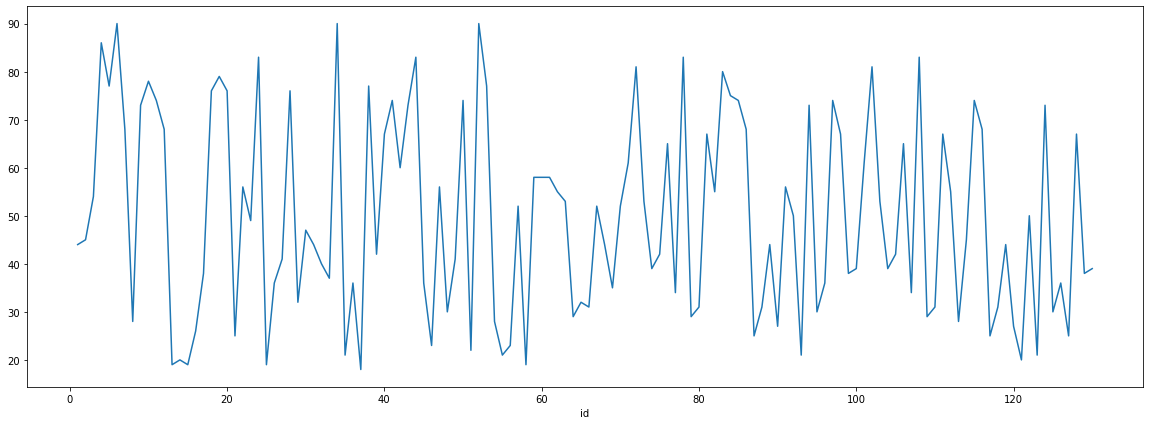

In [6]:
age.plot(figsize=(20,7))

<AxesSubplot:xlabel='id'>

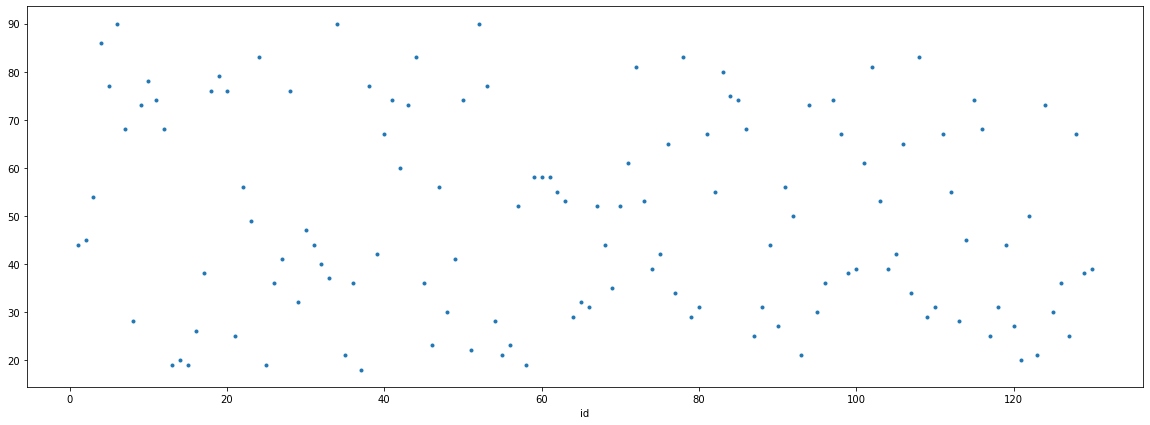

In [8]:
age.plot(style='.',figsize=(20,7))

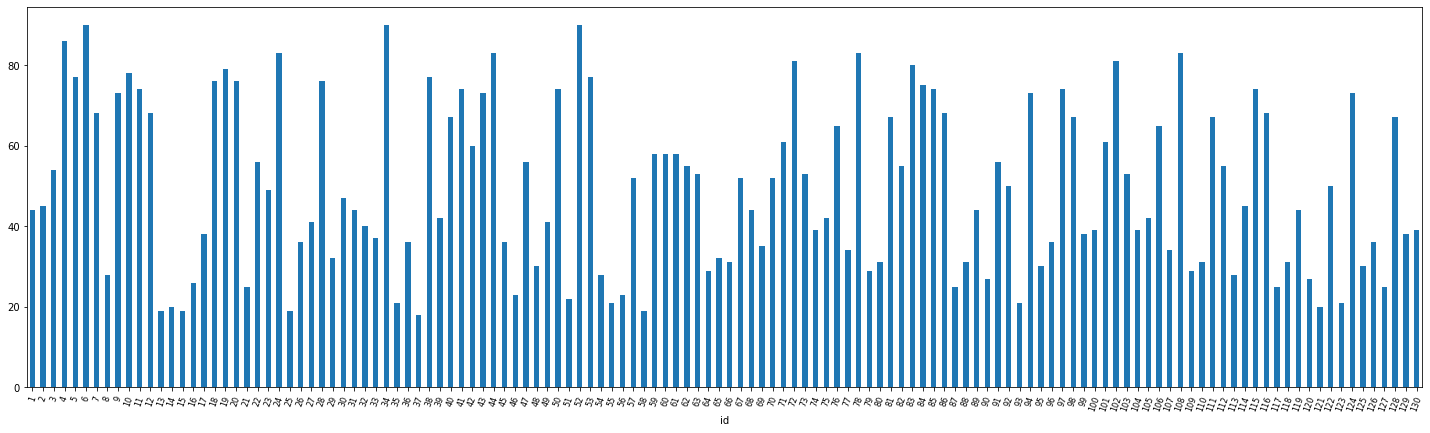

In [15]:
ax = age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [17]:
s_age = age.sort_values()
s_age.head()

id
37    18
25    19
15    19
13    19
58    19
Name: age, dtype: int64

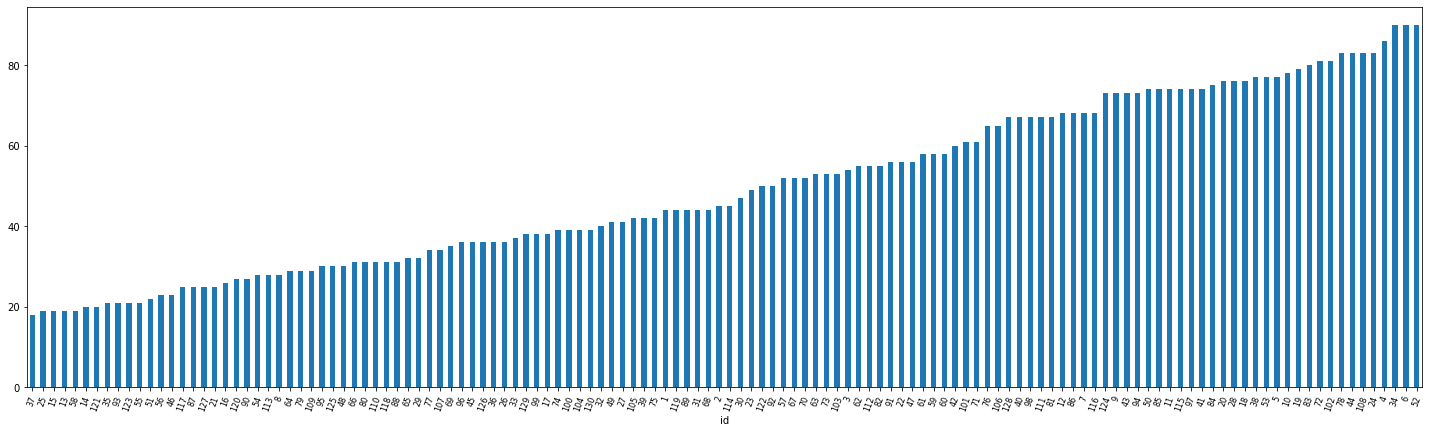

In [18]:
ax = s_age.plot.bar(x='lab', y='val', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

## Paramètres de centralité et de dispersion

In [12]:
age.describe()

count    130.000000
mean      49.553846
std       20.757015
min       18.000000
25%       31.000000
50%       45.000000
75%       68.000000
max       90.000000
Name: age, dtype: float64

<AxesSubplot:>

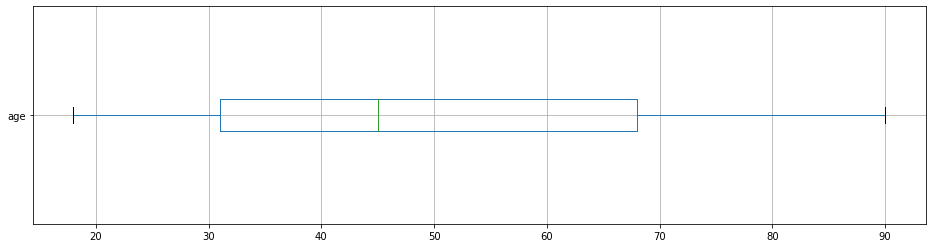

In [13]:
### Noter qu'on utilise le DataFrame car cet objet dispose d'une méthode boxplot
# ce qui n'est pas le cas d'une série (pd.Series)
obs.boxplot(column=['age'], vert=False, figsize=(16,4))

### Distribution par années de naissance

In [14]:
### La valeur la plus fréquente
age.mode()[0]

74

In [29]:
len(age[age == 74])

6

In [30]:
type(age)

pandas.core.series.Series

<AxesSubplot:xlabel='age'>

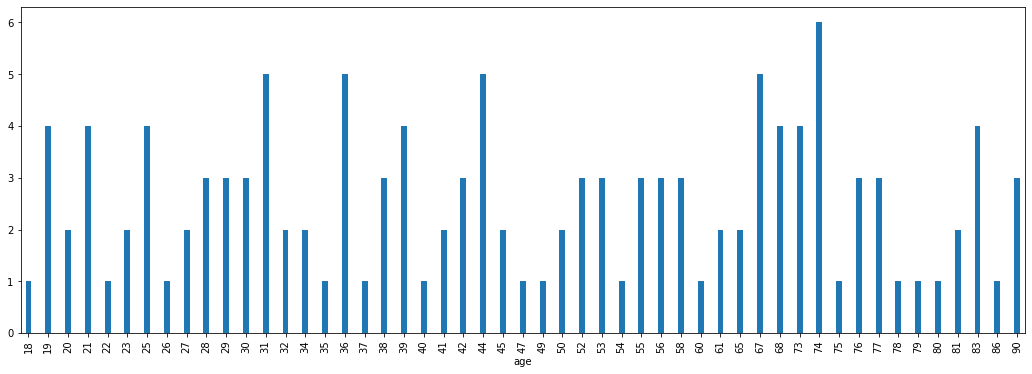

In [38]:
### Regrouper par valeur de la variable age et compter
# Noter qu'on utilise ici une Pandas Series
age.groupby(age).size().plot(kind='bar', width=0.3, figsize=(18,6))

In [40]:
### Alternative : regrouper et compter par âge directement à partir du tableau 'obs'
gb_generation = pd.DataFrame(obs.groupby('age').size())
gb_generation.columns = ['effectif']
gb_generation[5:10]

,effectif
age,
23,2
25,4
26,1
27,2
28,3


<class 'pandas.core.frame.DataFrame'>


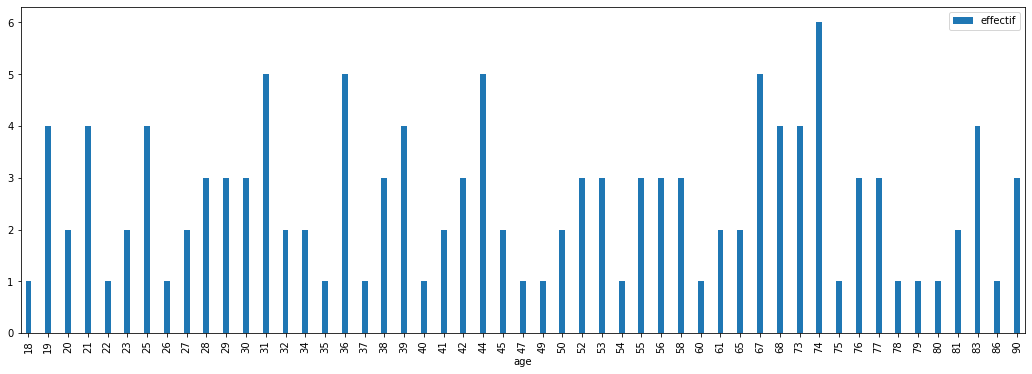

In [46]:
### Ici on utiliser pour la graphique un dataframe avec des noms de colonnes
print(type(gb_generation))
gb_generation.plot(kind='bar', width=0.3, figsize=(18,6))
plt.show()

In [57]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
# et coder les années de naissance en relation avec les générations
## fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

generations = [0, 21, 41, 61, 81, 101]
c_obs = obs.copy(deep=True)
c_obs['generation'] = pd.cut(c_obs['age'], generations, right=False)
# Inspection
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,"[41, 61)"
2,45,1,tous les jours,droite,7364,"[41, 61)"
3,54,3,de temps en temps,droite,8947,"[41, 61)"
4,86,2,tous les jours,populiste,6317,"[81, 101)"
5,77,2,tous les jours,gauche,6511,"[61, 81)"


In [58]:
### Transformer le code ajouté pour qu'il soit plus lisible
c_obs['generation'] = c_obs['generation'].apply(lambda x : str(int(x.left))+'-'+str(int(x.right))) \
        .apply(lambda x : x[:-1] + '0')
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,41-60
2,45,1,tous les jours,droite,7364,41-60
3,54,3,de temps en temps,droite,8947,41-60
4,86,2,tous les jours,populiste,6317,81-100
5,77,2,tous les jours,gauche,6511,61-80


In [59]:
### Alternative : regrouper et compter par génération avec la fonction Pandas 'groupby' (équivalente à la précédente)
gb_generation = pd.DataFrame(c_obs.groupby('generation').size())
gb_generation.columns = ['effectif']
gb_generation

,effectif
generation,
0-20,7
21-40,47
41-60,33
61-80,33
81-100,10


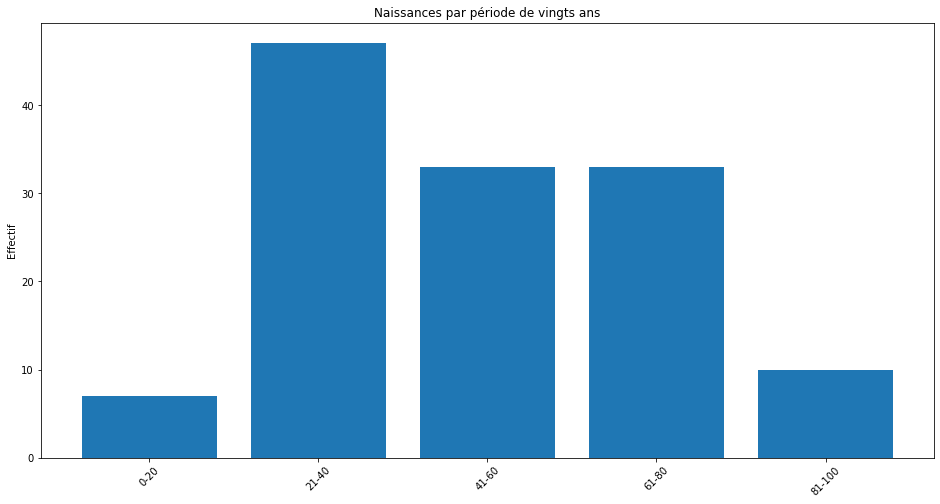

In [60]:
# Distribution par période de 20 ans – cf. dbpedia_analyse_nationalites pour la visualisation interactive des nationalités

objects = [l for l in gb_generation.index]
eff = [l for l in gb_generation['effectif']]

p1 = plt.bar(objects, eff)

plt.ylabel('Effectif')
plt.title('Naissances par période de vingts ans')
plt.gcf().set_size_inches(16, 8)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
# plt.savefig('exported_pictures/effectifs_annees_reference_par_periode.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


## Regrouper et analyser les variables qualitatives

In [6]:
### Regrouper et compter par fréquence de lecture du journal (variable qualitative)
gb_lecture_journal = obs.groupby('lecture_journal').size()
sgb_lecture_journal = gb_lecture_journal.sort_values(ascending = True)
sgb_lecture_journal

lecture_journal
de temps en temps                17
tous les jours                   17
très rarement                    30
le week-end                      31
trois-quatre fois par semaine    35
dtype: int64

In [6]:
### Regrouper et compter
gb_parti = obs.groupby('parti').size()
sgb_parti = gb_parti.sort_values(ascending = True)
sgb_parti

parti
droite        18
gauche        23
centre        25
populiste     30
écologiste    34
dtype: int64

In [7]:
df_partis = pd.DataFrame(sgb_parti)
df_partis.reset_index(inplace=True)
df_partis

,parti,0
0,droite,18
1,gauche,23
2,centre,25
3,populiste,30
4,écologiste,34


In [8]:
df_partis.columns = ['parti','effectif']
df_partis['code_parti'] = [4,2,5,3,1]
# df_partis.reset_index('parti').set_index('code_parti')
df_partis

,parti,effectif,code_parti
0,droite,18,4
1,gauche,23,2
2,centre,25,5
3,populiste,30,3
4,écologiste,34,1


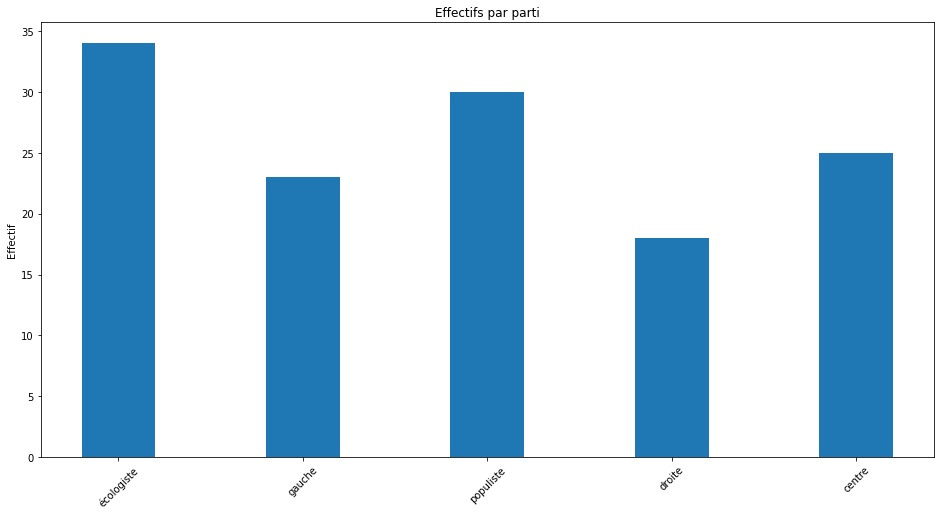

In [9]:
# Distribution par parti

objects = [l for l in df_partis['parti']]
eff = [l for l in df_partis['effectif']]

objects = [l for l in df_partis.sort_values('code_parti')['parti']]
eff = [l for l in df_partis.sort_values('code_parti')['effectif']]



p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectifs par parti')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


In [10]:
sgb_lecture_journal

lecture_journal
de temps en temps                17
tous les jours                   17
très rarement                    30
le week-end                      31
trois-quatre fois par semaine    35
dtype: int64

In [11]:
df_lecture_journal = pd.DataFrame(sgb_lecture_journal)
df_lecture_journal.reset_index(inplace=True)
df_lecture_journal.columns = ['lecture','effectif']
df_lecture_journal['code_lecture'] = [2,5,1,3,4]
df_lecture_journal

,lecture,effectif,code_lecture
0,de temps en temps,17,2
1,tous les jours,17,5
2,très rarement,30,1
3,le week-end,31,3
4,trois-quatre fois par semaine,35,4


In [12]:
df_lecture_journal.sort_values('code_lecture', inplace=True)
df_lecture_journal

,lecture,effectif,code_lecture
2,très rarement,30,1
0,de temps en temps,17,2
3,le week-end,31,3
4,trois-quatre fois par semaine,35,4
1,tous les jours,17,5


In [13]:
df_lecture_journal['effectif_cumule'] = df_lecture_journal['effectif'].cumsum()
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule
2,très rarement,30,1,30
0,de temps en temps,17,2,47
3,le week-end,31,3,78
4,trois-quatre fois par semaine,35,4,113
1,tous les jours,17,5,130


In [14]:
df_lecture_journal['frequence'] = (100 * df_lecture_journal['effectif'] \
                                   / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence
2,très rarement,30,1,30,23.08
0,de temps en temps,17,2,47,13.08
3,le week-end,31,3,78,23.85
4,trois-quatre fois par semaine,35,4,113,26.92
1,tous les jours,17,5,130,13.08


In [15]:
### Fréquence cumulée calculée en utilisant les effectifs cumulés

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif_cumule'] \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,très rarement,30,1,30,23.08,23.08
0,de temps en temps,17,2,47,13.08,36.15
3,le week-end,31,3,78,23.85,60.00
4,trois-quatre fois par semaine,35,4,113,26.92,86.92
1,tous les jours,17,5,130,13.08,100.00


In [16]:
### Fréquence cumulée calculée directement

# Cf. https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

df_lecture_journal['frequence_cumulee'] = (100 * df_lecture_journal['effectif'].cumsum() \
                                / df_lecture_journal['effectif'].sum()).round(2)
df_lecture_journal

,lecture,effectif,code_lecture,effectif_cumule,frequence,frequence_cumulee
2,très rarement,30,1,30,23.08,23.08
0,de temps en temps,17,2,47,13.08,36.15
3,le week-end,31,3,78,23.85,60.00
4,trois-quatre fois par semaine,35,4,113,26.92,86.92
1,tous les jours,17,5,130,13.08,100.00


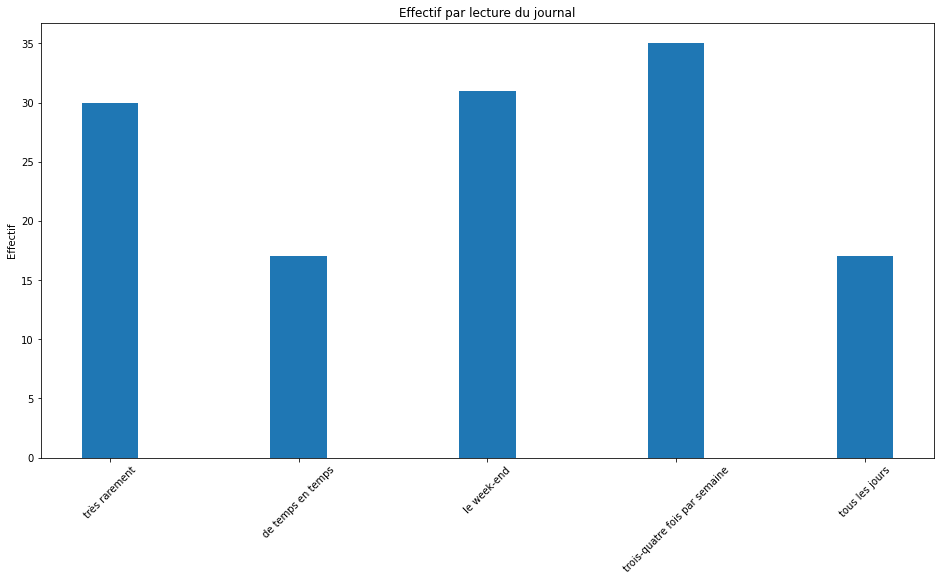

In [17]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal.sort_values('code_lecture')['lecture']]
eff = [l for l in df_lecture_journal.sort_values('code_lecture')['effectif']]

p1 = plt.bar(objects, eff, width=0.3)

#plt.xticks(l5Years)
plt.ylabel('Effectif')
plt.title('Effectif par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


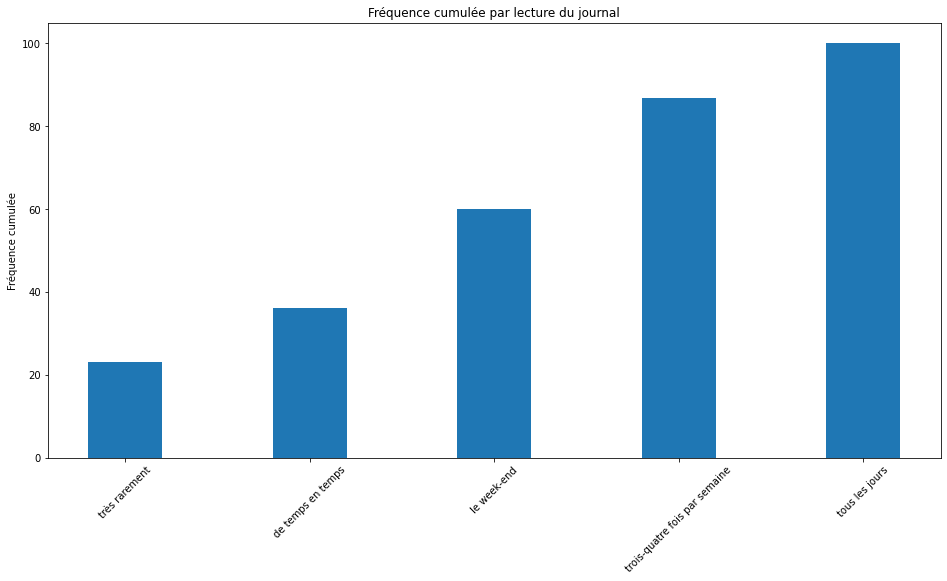

In [18]:
# Distribution par lecture journal

objects = [l for l in sgb_lecture_journal.index]
eff = [l for l in sgb_lecture_journal.values]


objects = [l for l in df_lecture_journal['lecture']]
eff = [l for l in df_lecture_journal['frequence_cumulee']]

p1 = plt.bar(objects, eff, width=0.4)

#plt.xticks(l5Years)
plt.ylabel('Fréquence cumulée')
plt.title('Fréquence cumulée par lecture du journal')
plt.gcf().set_size_inches(16, 8)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


# Comparaison de deux variables quantitatives

In [29]:
obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel
id,,,,,
1,44,3,de temps en temps,droite,9660
2,45,1,tous les jours,droite,7364
3,54,3,de temps en temps,droite,8947
4,86,2,tous les jours,populiste,6317
5,77,2,tous les jours,gauche,6511


In [30]:
obs['n_foyer'].describe()

count    130.000000
mean       2.153846
std        1.171109
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: n_foyer, dtype: float64

<AxesSubplot:>

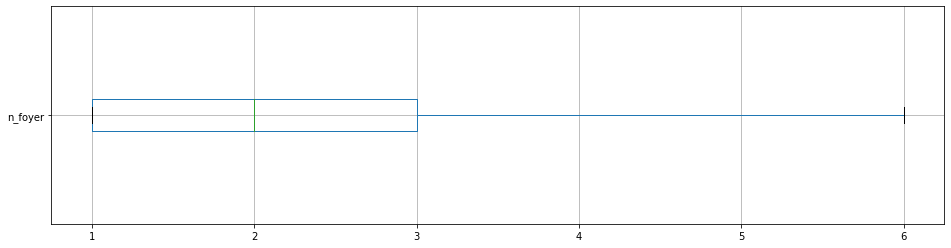

In [31]:
obs.boxplot(column=['n_foyer'], vert=False, figsize=(16,4))

In [32]:
obs['revenu_mensuel'].describe()

count      130.000000
mean      7048.969231
std       2553.219472
min       1400.000000
25%       5007.000000
50%       7383.500000
75%       9016.500000
max      11728.000000
Name: revenu_mensuel, dtype: float64

<AxesSubplot:>

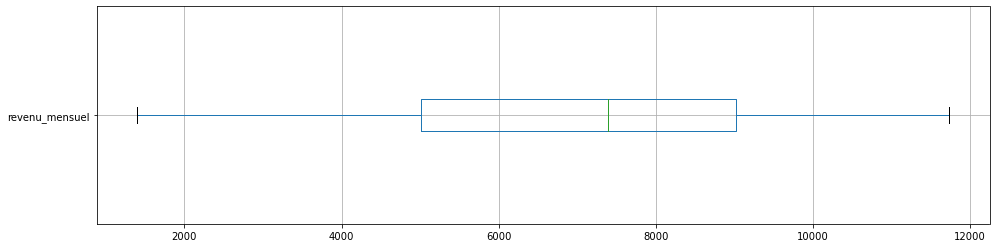

In [33]:
obs.boxplot(column=['revenu_mensuel'], vert=False, figsize=(16,4))

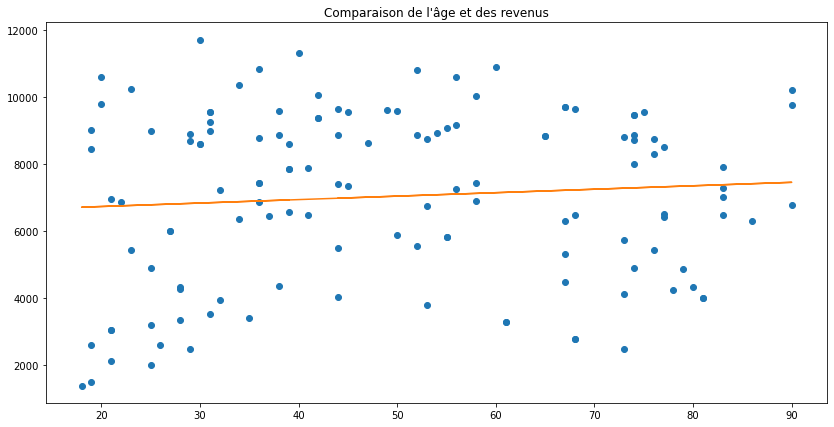

In [34]:
## Nuage de points avec droite de régression
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(obs['age'])
y = np.array(obs['revenu_mensuel'])


plt.rcParams["figure.figsize"] = [14, 7]

plt.plot(x, y, 'o')
plt.title("Comparaison de l'âge et des revenus")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)


In [35]:
### Coéfficient de corrélation de Pearsons 
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

0.08388479691005621

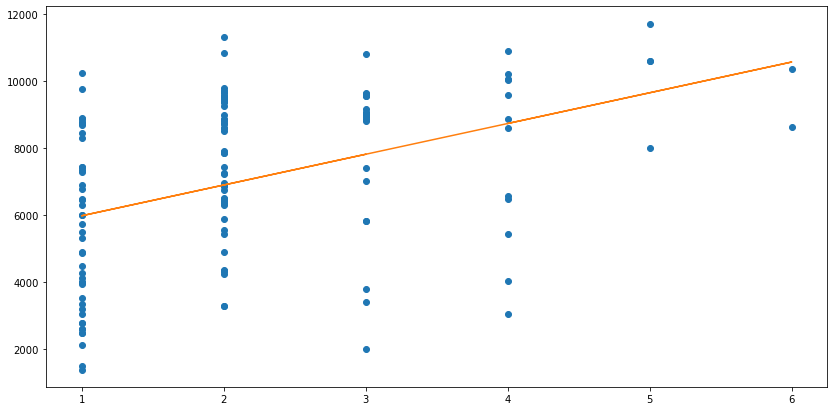

In [36]:
x = np.array(obs['n_foyer'])
y = np.array(obs['revenu_mensuel'])

plt.rcParams["figure.figsize"] = [14, 7]

plt.plot(x, y, 'o')


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

In [37]:
### Pearson Correlation Coefficient
# https://www.statology.org/pearson-correlation-coefficient/

r = np.corrcoef([x,y])[0][1]
r

0.42123680524320944

In [38]:
len(obs)

130

In [39]:
### https://www.statology.org/pearson-correlation-coefficient/
T = r * np.sqrt((len(obs)-2) / (1-r))
T

6.264419640438374

In [40]:
### p value
# https://www.statology.org/t-score-p-value-calculator/


# Variable qualitative et quantitative

Text(0, 0.5, 'Parti politique')

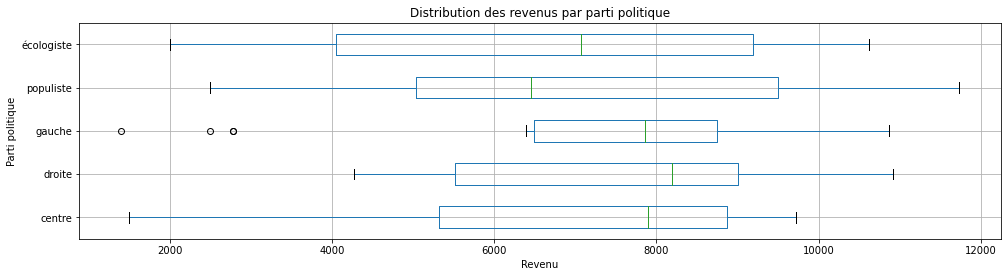

In [41]:
axes = obs.boxplot(column=['revenu_mensuel'],by=['parti'], vert=False, figsize=(16,4))

fig = axes.get_figure()

fig.suptitle('')
    
axes.set_title('Distribution des revenus par parti politique')

axes.set_xlabel('Revenu')
axes.set_ylabel('Parti politique')


In [42]:
obs[obs['parti'] == 'populiste']['revenu_mensuel'].describe()

count       30.000000
mean      6998.600000
std       2600.905049
min       2500.000000
25%       5036.750000
50%       6447.000000
75%       9494.250000
max      11728.000000
Name: revenu_mensuel, dtype: float64

# Deux variables qualitatives


* Hamon, Chapitre 4, 99-111


In [43]:
c_obs.head()

,age,n_foyer,lecture_journal,parti,revenu_mensuel,generation
id,,,,,,
1,44,3,de temps en temps,droite,9660,41-61
2,45,1,tous les jours,droite,7364,41-61
3,54,3,de temps en temps,droite,8947,41-61
4,86,2,tous les jours,populiste,6317,81-101
5,77,2,tous les jours,gauche,6511,61-81


### Tableau de contingence

In [44]:
### Le type d'origine est 'category' il faut transformer en 'str'
##  pour éviter le message d'erreur en créant la pivot_table
c_obs['generation']= c_obs['generation'].astype(str)

In [45]:
### La fonction pivot_table produit un tableau de contingence
## Au centre du tableau se trouvent les effectifs conjoints, 
## aux bords les effectifs marginaux qui correspondent 
## aux distributions indépendantes des variables

X = "parti"  # "0"
Y = "generation"

c_obs_parti_generation = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
c_obs_parti_generation

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
0-21,2,2,1,0,2,7
21-41,3,3,12,8,21,47
41-61,6,8,4,10,5,33
61-81,12,3,5,7,6,33
81-101,2,2,1,5,0,10
Total,25,18,23,30,34,130


In [46]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

c_obs_parti_generation_frequence = np.round(c_obs_parti_generation*100/c_obs_parti_generation.iloc[-1,-1],1)
c_obs_parti_generation_frequence

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
0-21,1.5,1.5,0.8,0.0,1.5,5.4
21-41,2.3,2.3,9.2,6.2,16.2,36.2
41-61,4.6,6.2,3.1,7.7,3.8,25.4
61-81,9.2,2.3,3.8,5.4,4.6,25.4
81-101,1.5,1.5,0.8,3.8,0.0,7.7
Total,19.2,13.8,17.7,23.1,26.2,100.0


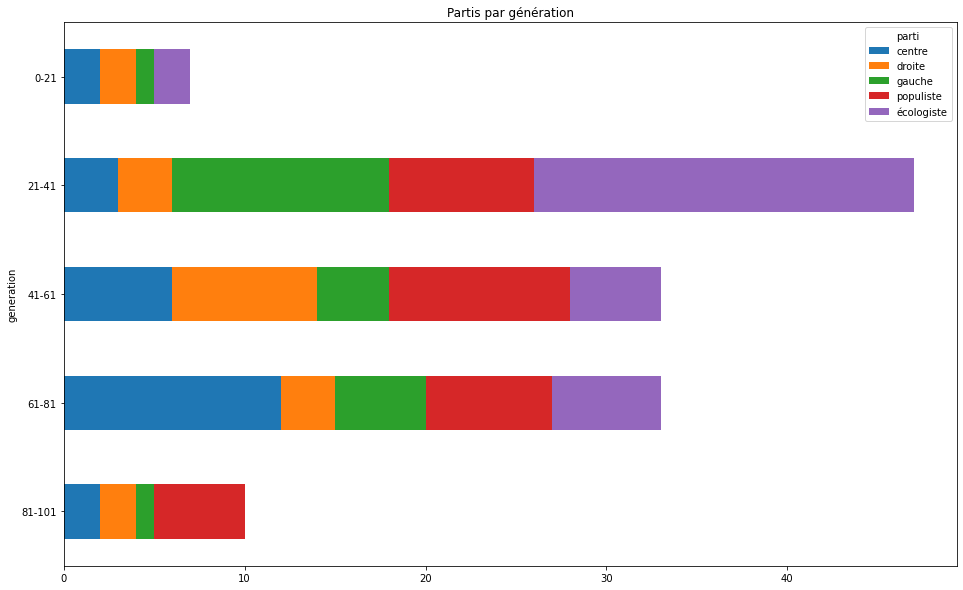

In [47]:
g = c_obs[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len) \
        .fillna(0).astype(int).sort_values(by=Y, ascending=False) \
        .plot( kind='barh', stacked=True,  figsize=(16,10),  title = 'Partis par génération')

In [49]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des lignes
stacked_data = c_obs_parti_generation.apply(lambda x: x*100/sum(x)*2, axis=1) # axis=0
stacked_data

parti,centre,droite,gauche,populiste,écologiste,Total
generation,,,,,,
0-21,28.571429,28.571429,14.285714,0.000000,28.571429,100.0
21-41,6.382979,6.382979,25.531915,17.021277,44.680851,100.0
41-61,18.181818,24.242424,12.121212,30.303030,15.151515,100.0
61-81,36.363636,9.090909,15.151515,21.212121,18.181818,100.0
81-101,20.000000,20.000000,10.000000,50.000000,0.000000,100.0
Total,19.230769,13.846154,17.692308,23.076923,26.153846,100.0


parti          centre     droite     gauche  populiste  écologiste
generation                                                        
0-21        28.571429  28.571429  14.285714   0.000000   28.571429
21-41        6.382979   6.382979  25.531915  17.021277   44.680851
41-61       18.181818  24.242424  12.121212  30.303030   15.151515
61-81       36.363636   9.090909  15.151515  21.212121   18.181818
81-101      20.000000  20.000000  10.000000  50.000000    0.000000
Total       19.230769  13.846154  17.692308  23.076923   26.153846


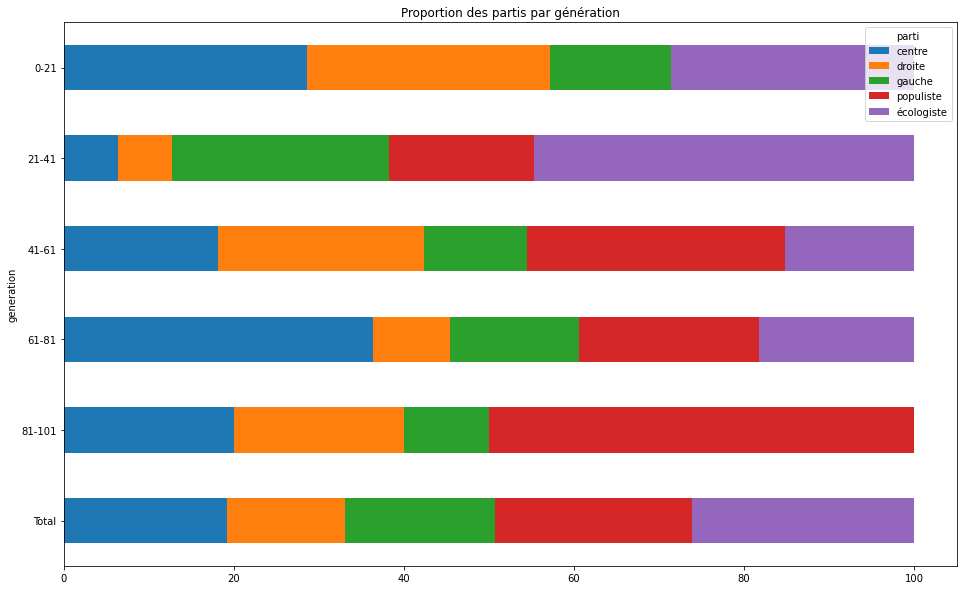

In [50]:
print(stacked_data.iloc[0:, 0:-1])

plot = stacked_data.iloc[0:, 0:-1].sort_values(by=Y, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

In [51]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data = c_obs_parti_generation.apply(lambda x: x*100/sum(x)*2, axis=0) # axis=0  1
stacked_data.transpose()

generation,0-21,21-41,41-61,61-81,81-101,Total
parti,,,,,,
centre,8.000000,12.000000,24.000000,48.000000,8.000000,100.0
droite,11.111111,16.666667,44.444444,16.666667,11.111111,100.0
gauche,4.347826,52.173913,17.391304,21.739130,4.347826,100.0
populiste,0.000000,26.666667,33.333333,23.333333,16.666667,100.0
écologiste,5.882353,61.764706,14.705882,17.647059,0.000000,100.0
Total,5.384615,36.153846,25.384615,25.384615,7.692308,100.0


parti       centre     droite     gauche  populiste  écologiste      Total
generation                                                                
0-21           8.0  11.111111   4.347826   0.000000    5.882353   5.384615
21-41         12.0  16.666667  52.173913  26.666667   61.764706  36.153846
41-61         24.0  44.444444  17.391304  33.333333   14.705882  25.384615
61-81         48.0  16.666667  21.739130  23.333333   17.647059  25.384615
81-101         8.0  11.111111   4.347826  16.666667    0.000000   7.692308


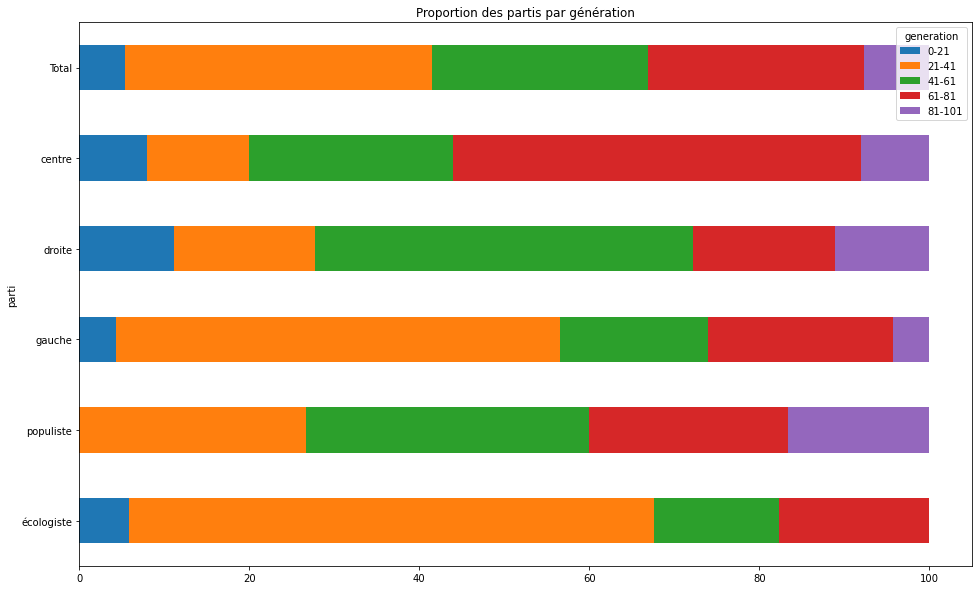

In [52]:
print(stacked_data.iloc[0:-1, 0:])

plot = stacked_data.iloc[0:-1, 0:].transpose().sort_values(by=X, ascending=False)\
.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion des partis par génération')

### Tableau en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [54]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_generation.iat[-1,-1]

130

In [58]:
tx = c_obs_parti_generation.loc[:,["Total"]]
ty = c_obs_parti_generation.loc[["Total"],:]
n = c_obs_parti_generation.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


parti       centre  droite  gauche  populiste  écologiste  Total
generation                                                      
0-21             1       0       1          1           1      7
21-41            9       6       8         10          12     47
41-61            6       4       5          7           8     33
61-81            6       4       5          7           8     33
81-101           1       1       1          2           2     10
Total           25      18      23         30          34    130


In [72]:
c_obs_parti_generation.iloc([:,:])

SyntaxError: invalid syntax (<ipython-input-72-9d4d38313e00>, line 1)

In [74]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_generation-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.astype(int))


parti       centre  droite  gauche  populiste  écologiste
generation                                               
0-21             0       1       0         -1           0
21-41           -6      -3       3         -2           8
41-61            0       3      -1          2          -3
61-81            5      -1       0          0          -2
81-101           0       0       0          2          -2


In [75]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = (c_obs_parti_generation-indep)**2/indep
ecarts_ponderes.iloc[:-1,:-1]

parti,centre,droite,gauche,populiste,écologiste
generation,,,,,
0-21,0.317582,1.096215,0.045915,1.615385,0.015643
21-41,4.034206,1.890671,1.632683,0.746863,6.168403
41-61,0.018881,2.575965,0.578909,0.746698,1.527382
61-81,5.037063,0.538928,0.120411,0.049728,0.801892
81-101,0.003077,0.273504,0.334448,3.141026,2.615385


35.926864201160335


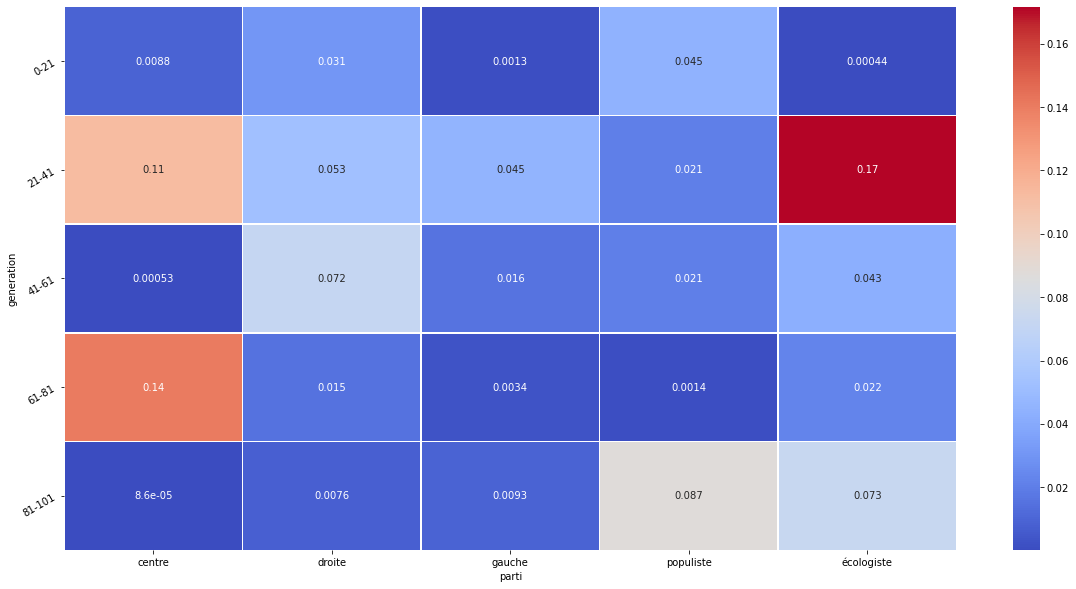

In [79]:
xi_n = ecarts_ponderes.sum().sum()
print(xi_n)


tableau = ecarts_ponderes.iloc[:-1,:-1]/xi_n
fig, ax = plt.subplots(figsize=(20,10))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

### Appartenance politique et fréquence de lecture du journal

In [80]:
X = "parti"  # "0"
Y = "lecture_journal"

c_obs_parti_lecture = c_obs[[Y,X]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int) 
c_obs_parti_lecture

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement,Total
parti,,,,,,
centre,5,6,3,6,5,25
droite,2,6,3,4,3,18
gauche,3,3,2,5,10,23
populiste,4,9,3,9,5,30
écologiste,3,7,6,11,7,34
Total,17,31,17,35,30,130


In [81]:
### Total général, dernière cellule de la dernière ligne
c_obs_parti_lecture.iat[-1,-1]

130

In [82]:
c_obs_parti_lecture.iloc[:-1,:-1]

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement
parti,,,,,
centre,5,6,3,6,5
droite,2,6,3,4,3
gauche,3,3,2,5,10
populiste,4,9,3,9,5
écologiste,3,7,6,11,7


In [83]:
tx = c_obs_parti_lecture.loc[:,["Total"]]
ty = c_obs_parti_lecture.loc[["Total"],:]
n = c_obs_parti_lecture.iat[-1,-1]   # .iloc[:-1,:-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Arrondi
print(indep.astype(int))


lecture_journal  de temps en temps  le week-end  tous les jours  \
parti                                                             
centre                           3            5               3   
droite                           2            4               2   
gauche                           3            5               3   
populiste                        3            7               3   
écologiste                       4            8               4   
Total                           17           31              17   

lecture_journal  trois-quatre fois par semaine  très rarement  Total  
parti                                                                 
centre                                       6              5     25  
droite                                       4              4     18  
gauche                                       6              5     23  
populiste                                    8              6     30  
écologiste                           

In [77]:
### Différence en effectifs entre le théorique et l'observé
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (c_obs_parti_lecture-indep)
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.iloc[:-1,:-1].astype(int))


lecture_journal  de temps en temps  le week-end  tous les jours  \
parti                                                             
centre                           1            0               0   
droite                           0            1               0   
gauche                           0           -2              -1   
populiste                        0            1               0   
écologiste                      -1           -1               1   

lecture_journal  trois-quatre fois par semaine  très rarement  
parti                                                          
centre                                       0              0  
droite                                       0             -1  
gauche                                      -1              4  
populiste                                    0             -1  
écologiste                                   1              0  


In [80]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = ((c_obs_parti_lecture-indep)**2/indep).iloc[:-1,:-1]
ecarts_ponderes

lecture_journal,de temps en temps,le week-end,tous les jours,trois-quatre fois par semaine,très rarement
parti,,,,,
centre,0.916290,0.000248,0.022172,0.079341,0.102564
droite,0.053193,0.679404,0.177376,0.147741,0.320513
gauche,0.000020,1.125569,0.337616,0.229575,4.148272
populiste,0.001508,0.476427,0.217195,0.105495,0.534188
écologiste,0.470375,0.151336,0.543040,0.372334,0.091252


11.303040314550042


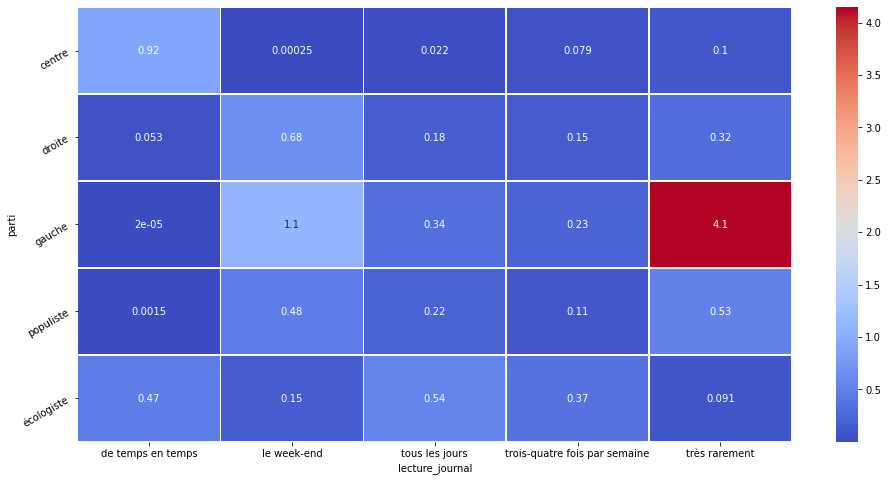

In [82]:
## Chi2 :somme des écarts pondérés

xi_n = ecarts_ponderes.sum().sum() 
print(xi_n)

table = ecarts_ponderes/xi_n
fig, ax = plt.subplots(figsize=(16,8))         
# Sample figsize in inches
g = sns.heatmap(ecarts_ponderes, annot=ecarts_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labels = ecarts_ponderes.index
p = g.set_yticklabels(labels, rotation=30)